In [1]:


#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
     


In [2]:
data = pd.read_csv("../Phishing_Legitimate_full.csv")

In [3]:


#removing 1st column
data = data.drop(data.columns[0], axis=1)
     


In [4]:
#shuffling the data
data = shuffle(data)

In [5]:
# Check for columns with 90% or more similar values and drop them
threshold = 0.9 * len(data)
data = data.dropna(thresh=threshold, axis=1)

In [6]:


shuffled_data = data.sample(frac=1).reset_index(drop=True)
     


In [7]:
X = data.drop('CLASS_LABEL', axis=1)
y = data['CLASS_LABEL']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Train Support Vector Machine (SVM) Classifier
clf = SVC(kernel='linear')  # You can change the kernel if needed
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [10]:
# Evaluate the model
y_pred = clf.predict(X_test)

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1198   82]
 [  70 1150]]


In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Accuracy: 0.9392, Precision: 0.9334415584415584, Recall: 0.9426229508196722


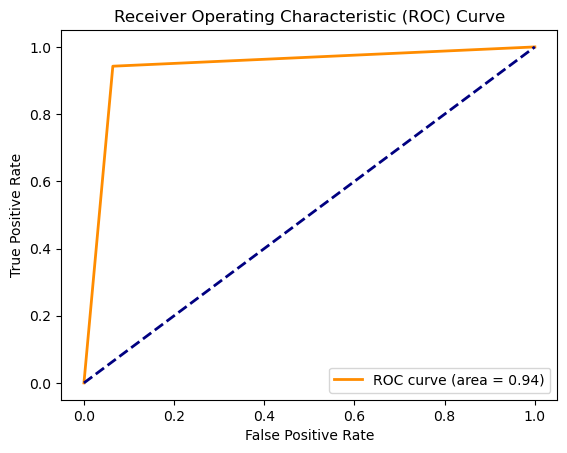

In [13]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


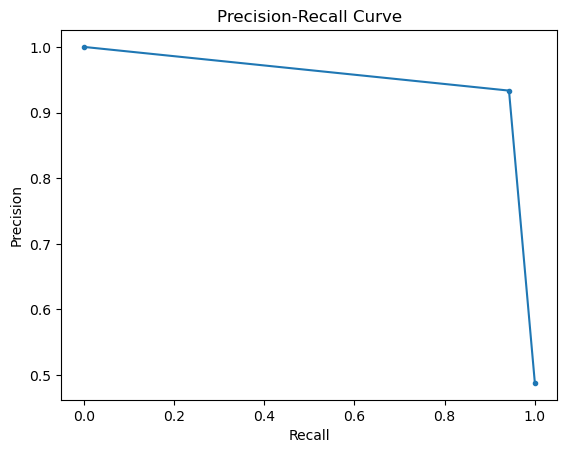

In [14]:
# Precision-Recall Curve (PRC)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()